In [2]:
import tensorflow as tf
import pandas as ad
import os 
import numpy as np
import SimpleITK as sitk
import matplotlib.pyplot as plt

In [3]:
unet = tf.keras.models.load_model('unet.h5', compile=False)
deeplab = tf.keras.models.load_model('deeplabv3plus.h5', compile=False)
pspnet = tf.keras.models.load_model('pspnet.h5', compile=False)

['10.1.npy', '100.1.npy', '100.2.npy', '104.1.npy', '11.1.npy', '110.1.npy', '111.1.npy', '112.1.npy', '113.1.npy', '114.1.npy', '115.1.npy', '115.2.npy', '115.3.npy', '115.4.npy', '115.5.npy', '115.6.npy', '115.7.npy', '117.1.npy', '117.2.npy', '117.3.npy', '117.4.npy', '117.5.npy', '117.6.npy', '118.1.npy', '119.1.npy', '119.2.npy', '119.3.npy', '12.1.npy', '12.2.npy', '12.3.npy', '12.4.npy', '120.1.npy', '120.2.npy', '121.1.npy', '121.2.npy', '121.3.npy', '121.4.npy', '125.1.npy', '128.1.npy', '128.2.npy', '129.1.npy', '129.2.npy', '129.3.npy', '13.1.npy', '13.2.npy', '132.1.npy', '132.2.npy', '133.1.npy', '133.2.npy', '133.3.npy', '135.1.npy', '135.2.npy', '135.3.npy', '135.4.npy', '135.5.npy', '136.1.npy', '136.2.npy', '136.3.npy', '137.1.npy', '137.2.npy', '137.3.npy', '137.4.npy', '137.5.npy', '137.6.npy', '139.1.npy', '139.2.npy', '139.3.npy', '14.1.npy', '140.1.npy', '140.2.npy', '140.3.npy', '141.1.npy', '142.1.npy', '142.2.npy', '143.1.npy', '145.1.npy', '145.2.npy', '145.3.

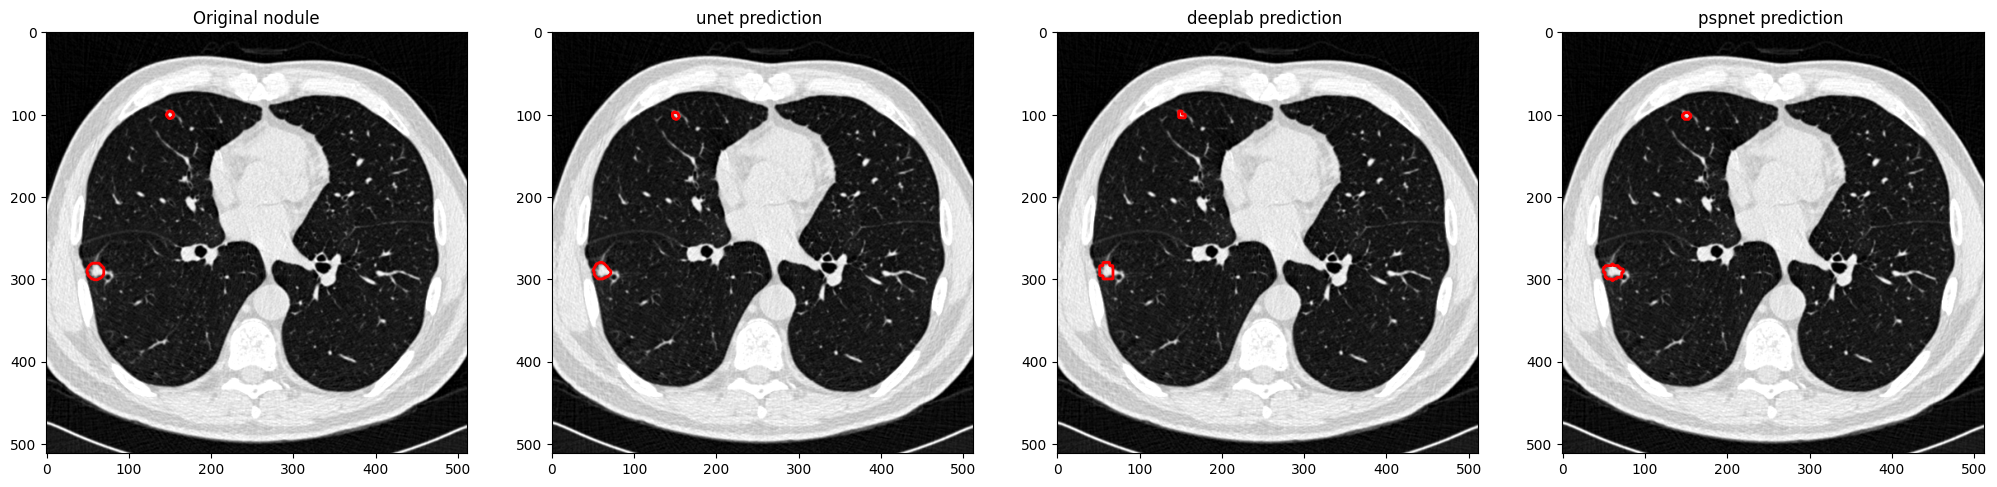

1/1 [==============================] - 0s 23ms/step


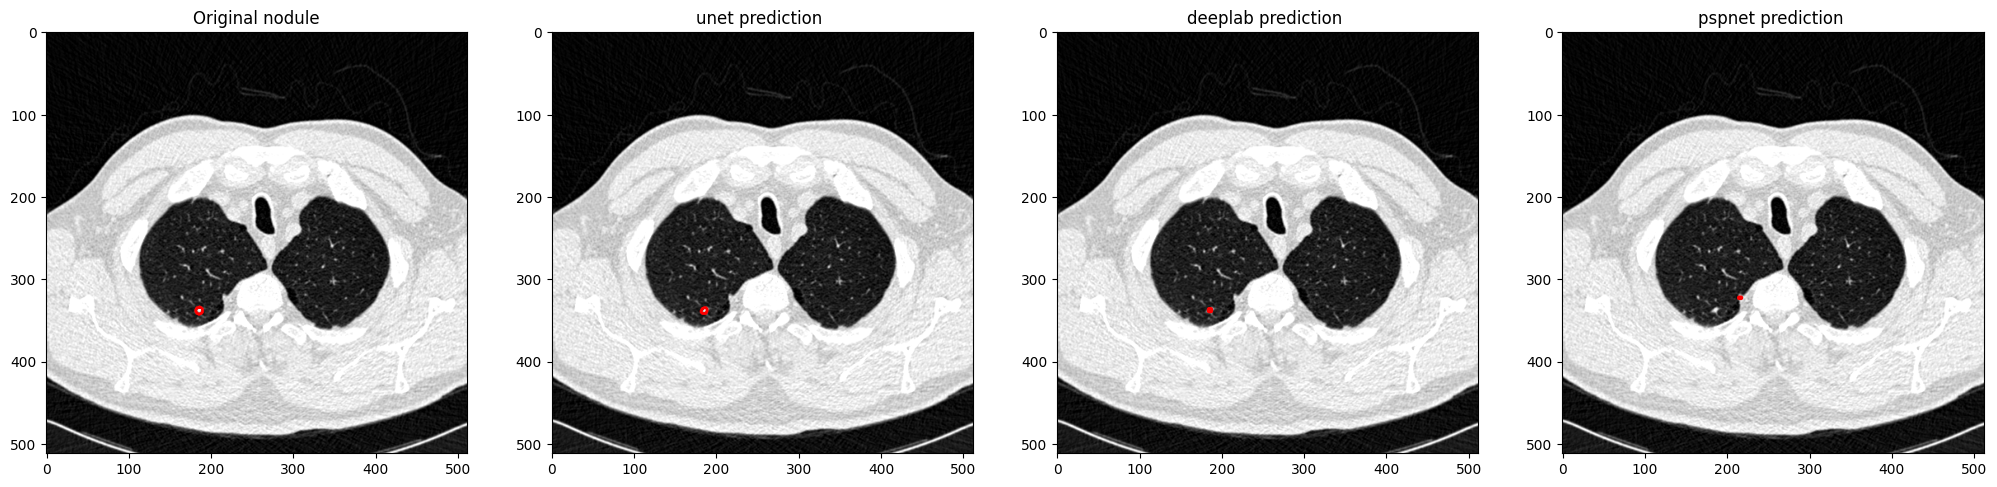

1/1 [==============================] - 0s 23ms/step


C:\Users\gamer\AppData\Local\Temp\ipykernel_18852\1606930534.py:22: UserWarning: No contour levels were found within the data range.
  ax2.contour(pred1.reshape((512,512)), levels=[0.4], colors='r', linewidths=2)


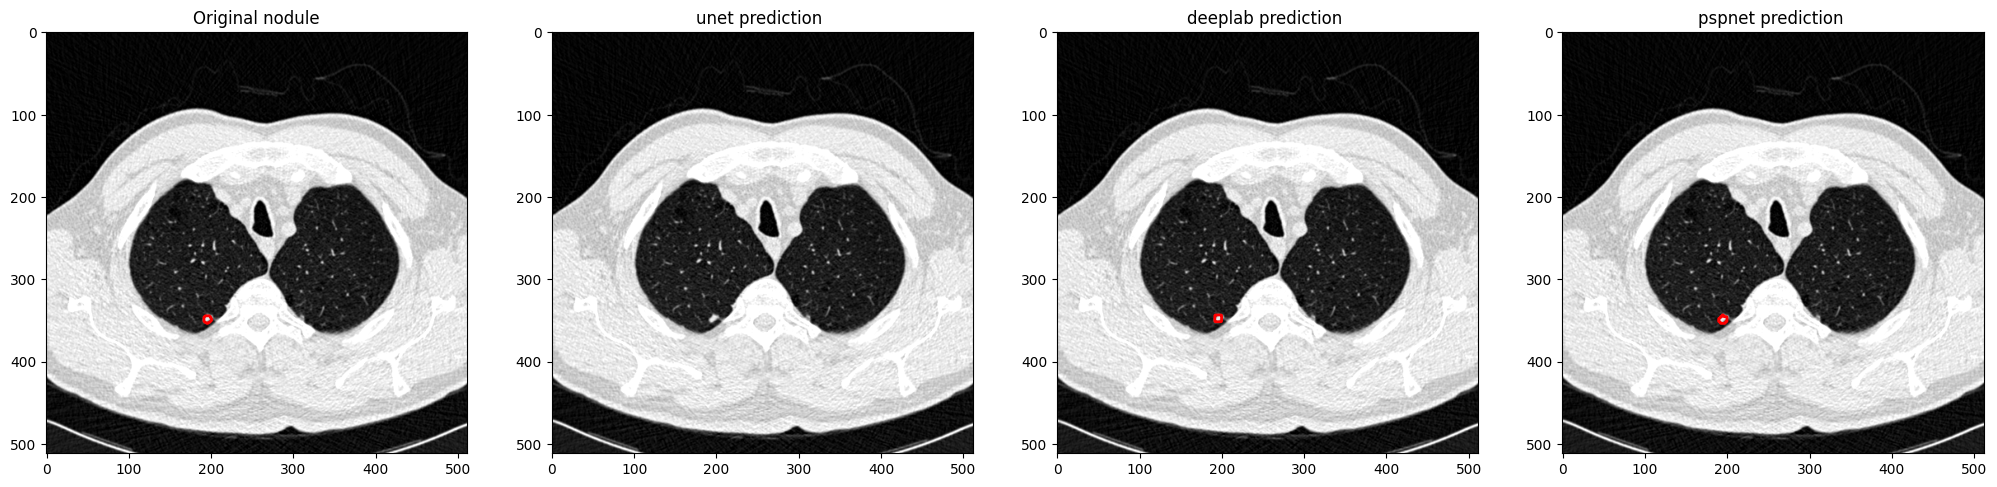

1/1 [==============================] - 0s 21ms/step


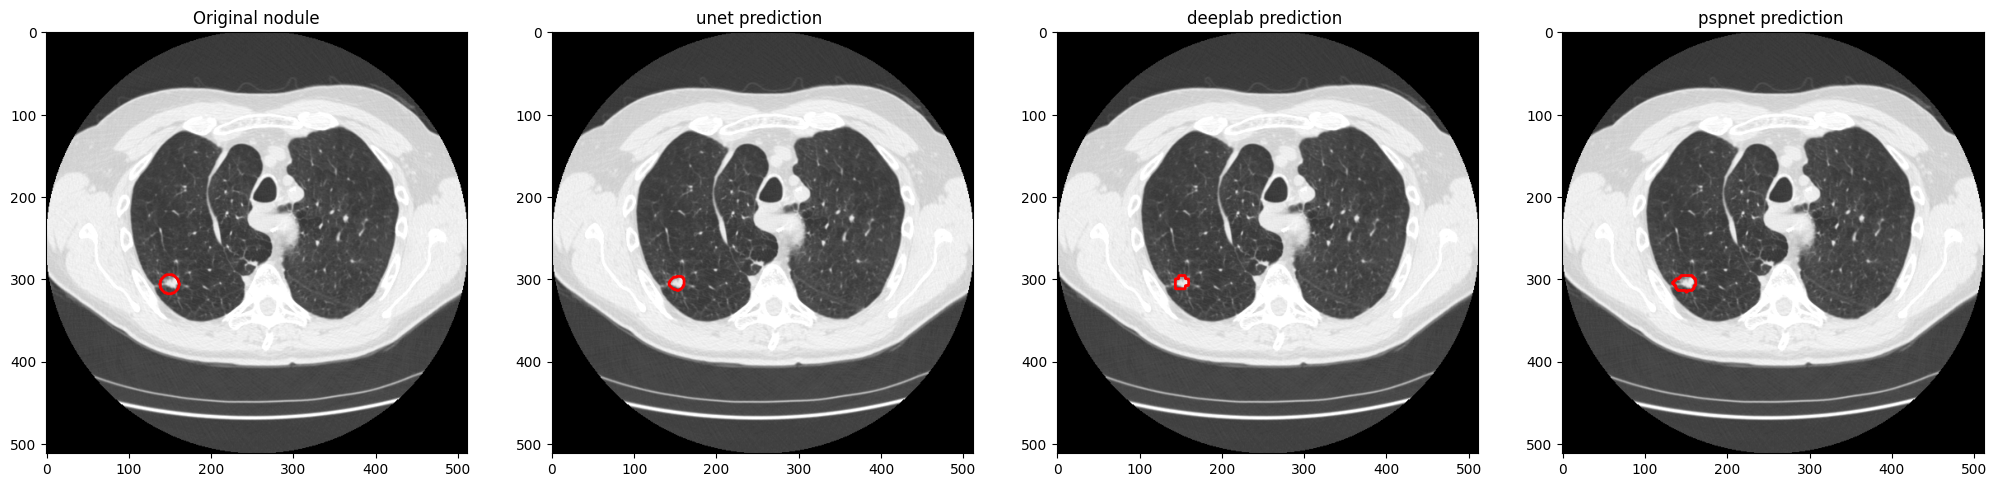

1/1 [==============================] - 0s 21ms/step


C:\Users\gamer\AppData\Local\Temp\ipykernel_18852\1606930534.py:28: UserWarning: No contour levels were found within the data range.
  ax4.contour(pred3.reshape((512,512)), levels=[0.4], colors='r', linewidths=2)


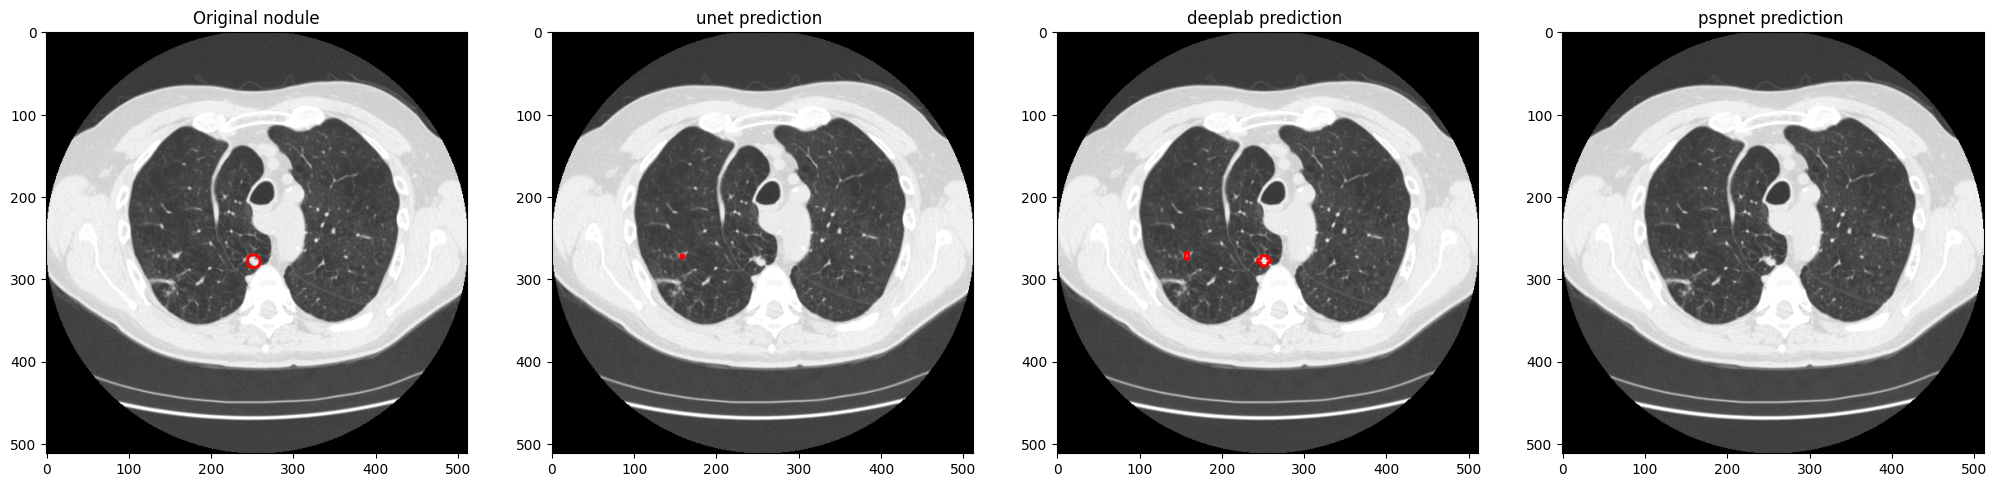

1/1 [==============================] - 0s 21ms/step


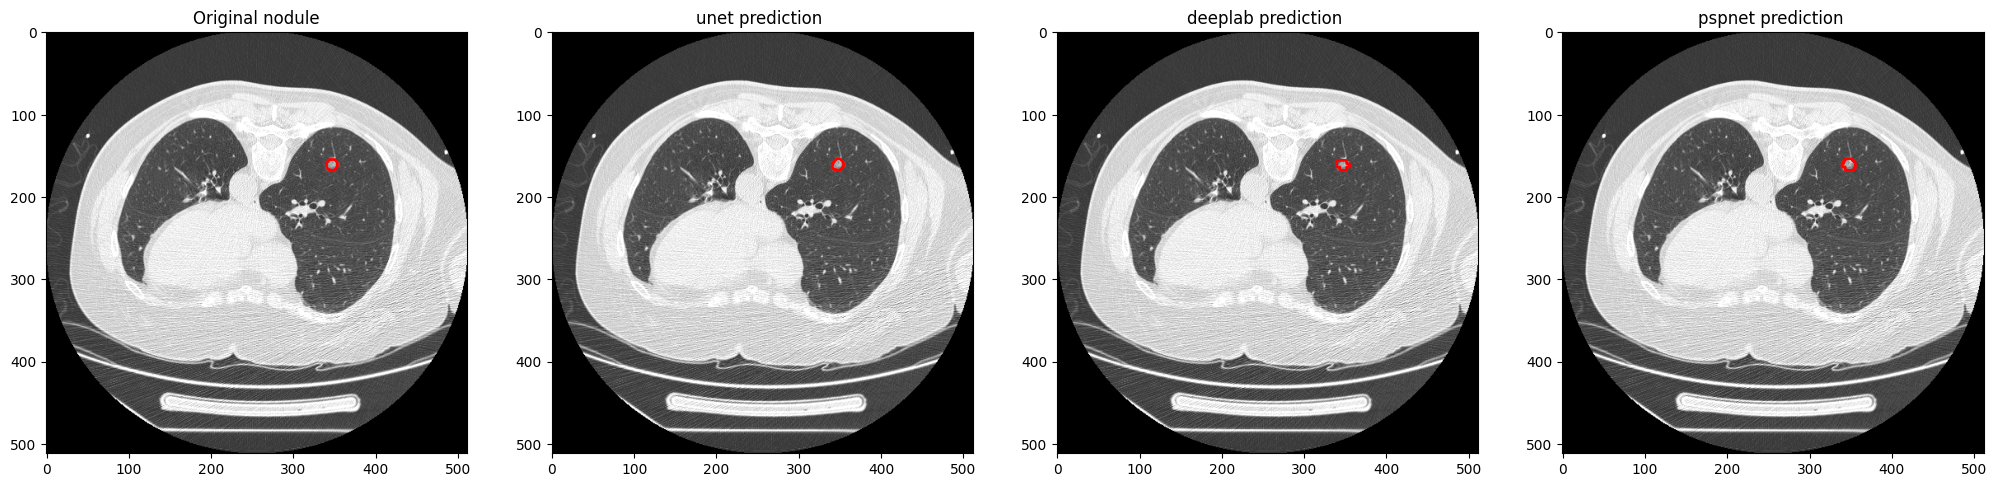

1/1 [==============================] - 0s 17ms/step


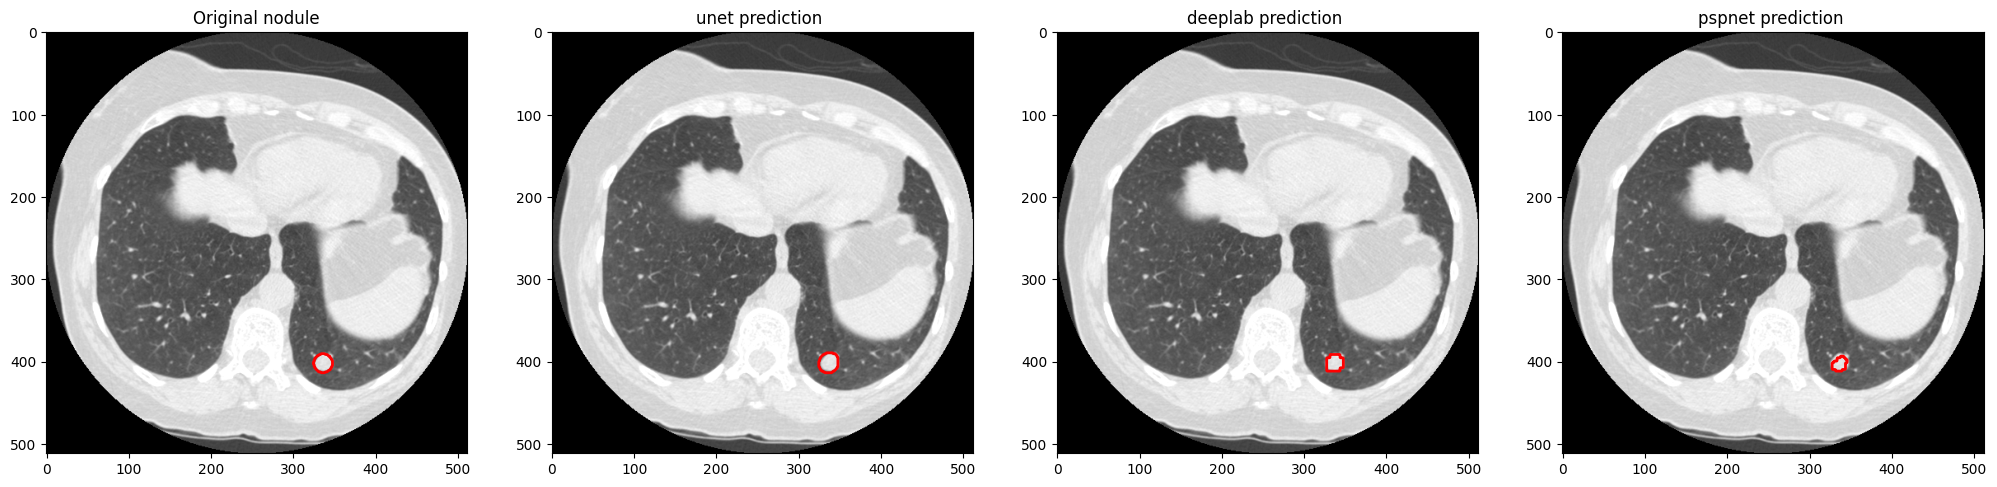

1/1 [==============================] - 0s 24ms/step


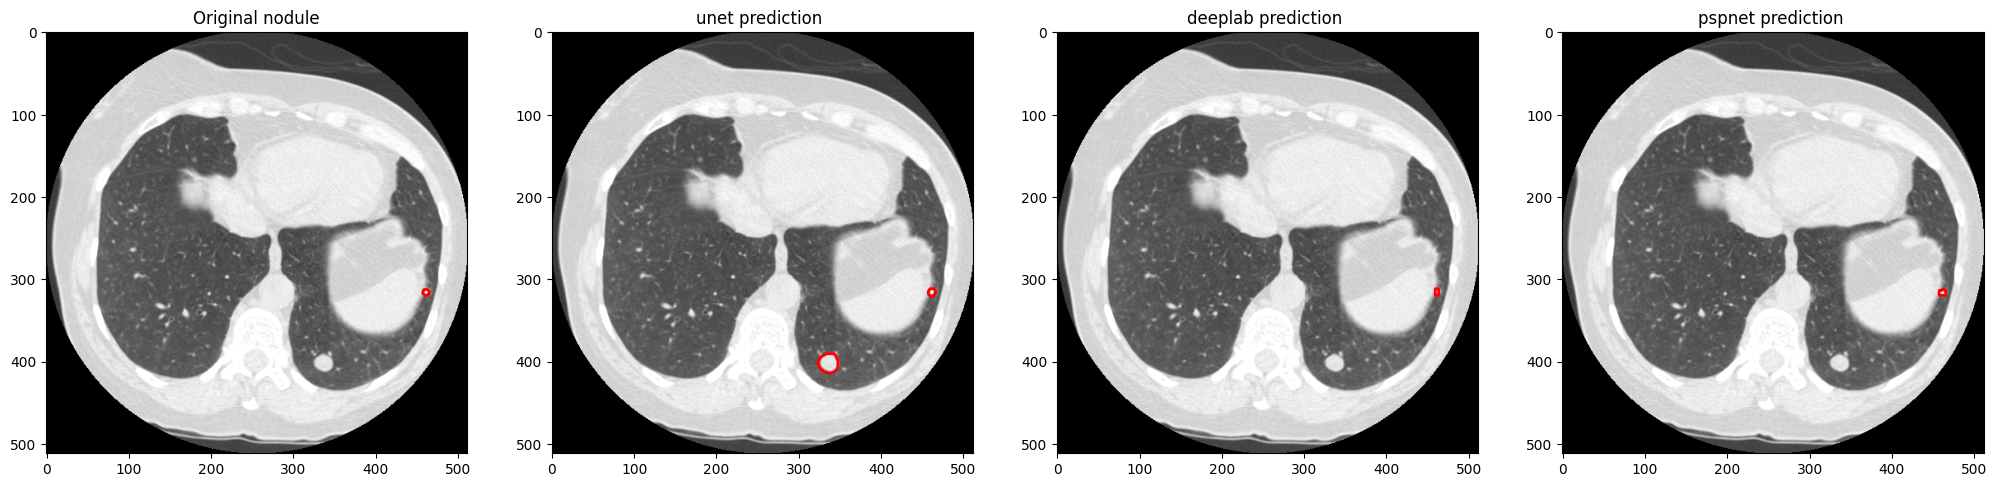

1/1 [==============================] - 0s 109ms/step


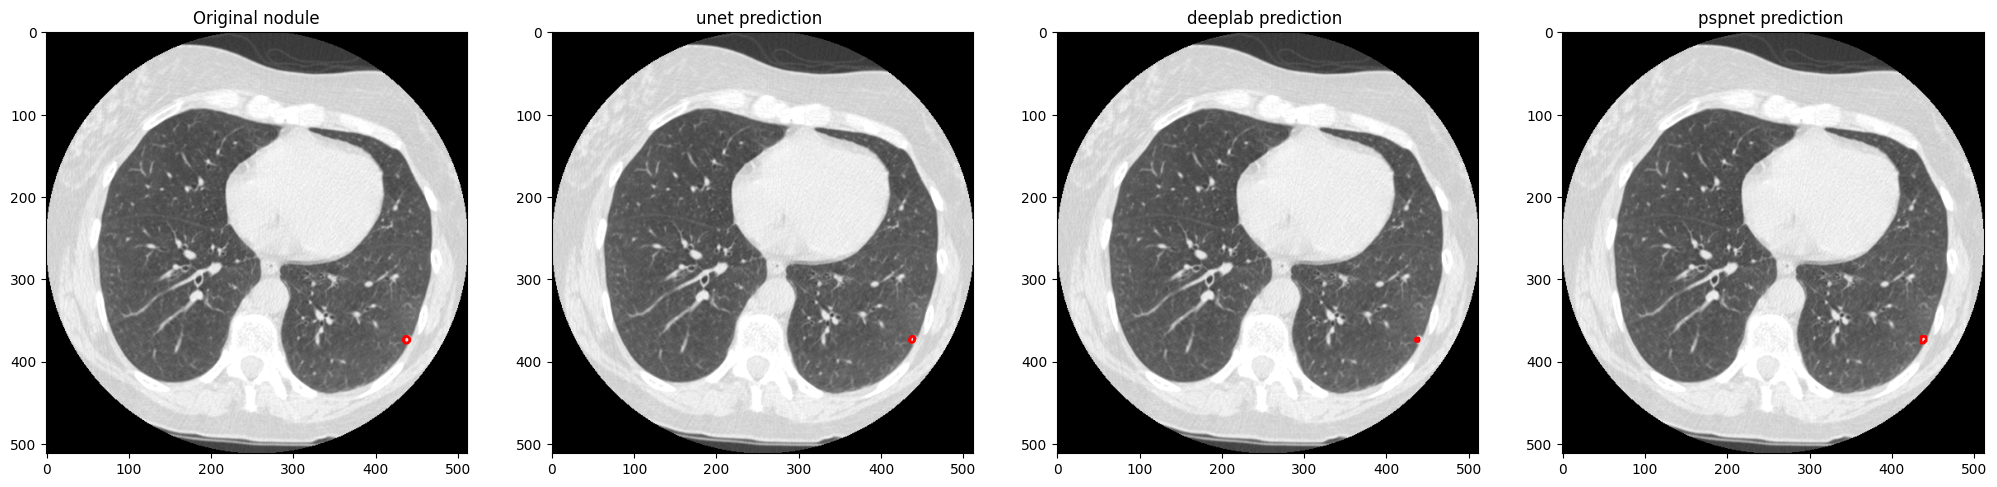

1/1 [==============================] - 0s 25ms/step


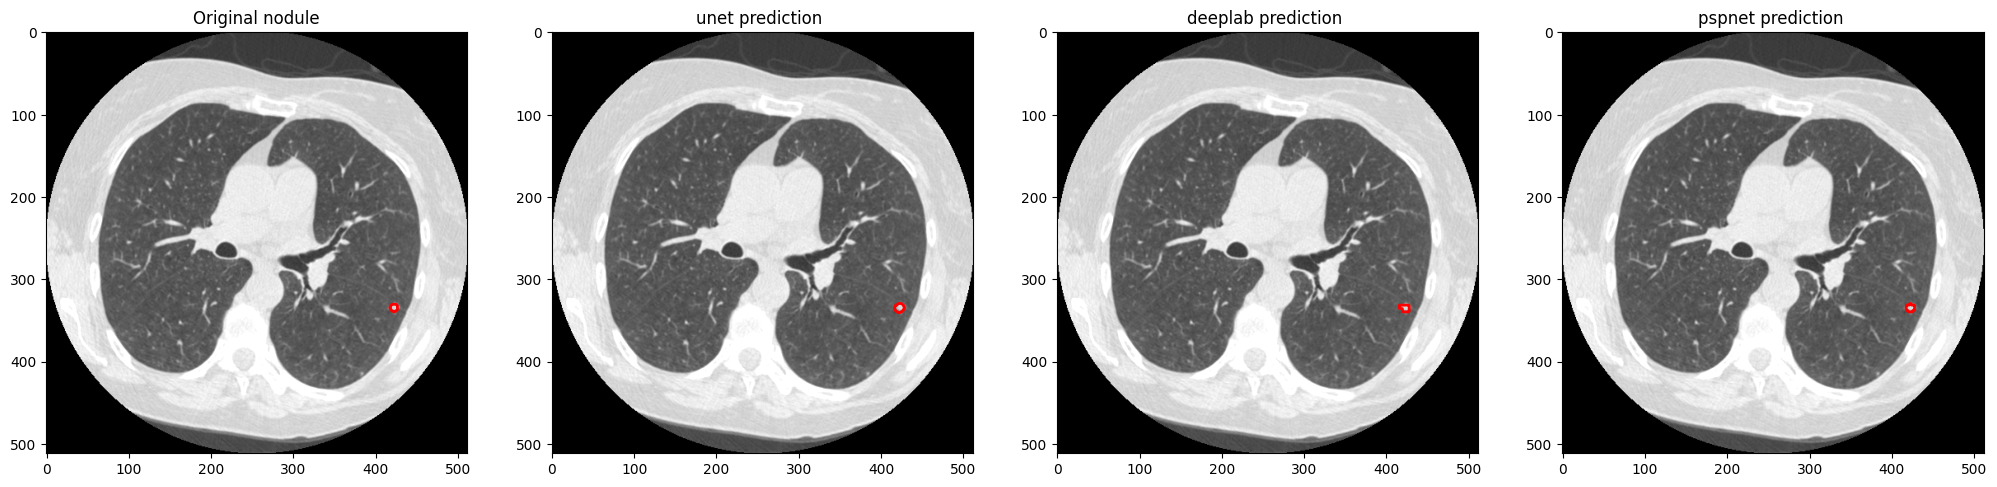

In [4]:
imges = os.listdir("D:/fin_de_etude/data/data2D/nodule/")

print(imges)
imges = imges[320:330]

for file in imges:
    img = np.load(os.path.join("D:/fin_de_etude/data/data2D/nodule/",file))
    mask =  np.load(os.path.join("D:/fin_de_etude/data/nodule_mask/nodule/",file))
    img = img/255
    pred1 = unet.predict(img.reshape(1,512,512,1))
    pred2 = deeplab.predict(img.reshape(1,512,512,1))
    pred3 = pspnet.predict(img.reshape(1,512,512,1))
    pred1 =np.where(pred1>0.5,1,0)
    pred2 =np.where(pred2>0.5,1,0)
    pred3 =np.where(pred3>0.5,1,0)
    img = img*255
    fig, (ax1, ax2,ax3,ax4) = plt.subplots(ncols=4, figsize=(25, 25))
    ax1.imshow(img,cmap="gray" )
    ax1.contour(mask, levels=[0.4], colors='r', linewidths=2)
    ax1.set_title('Original nodule')
    ax2.imshow(img,cmap='gray')
    ax2.contour(pred1.reshape((512,512)), levels=[0.4], colors='r', linewidths=2)
    ax2.set_title('unet prediction ')
    ax3.imshow(img,cmap='gray')
    ax3.contour(pred2.reshape((512,512)), levels=[0.4], colors='r', linewidths=2)
    ax3.set_title('deeplab prediction ')
    ax4.imshow(img,cmap='gray')
    ax4.contour(pred3.reshape((512,512)), levels=[0.4], colors='r', linewidths=2)
    ax4.set_title('pspnet prediction ')
   
    
    
    

    plt.show()

1/1 [==============================] - 0s 22ms/step


C:\Users\gamer\AppData\Local\Temp\ipykernel_18852\763236617.py:17: UserWarning: No contour levels were found within the data range.
  ax1.contour(mask, levels=[0.4], colors='r', linewidths=2)
C:\Users\gamer\AppData\Local\Temp\ipykernel_18852\763236617.py:20: UserWarning: No contour levels were found within the data range.
  ax2.contour(pred1.reshape((512,512)), levels=[0.4], colors='r', linewidths=2)
C:\Users\gamer\AppData\Local\Temp\ipykernel_18852\763236617.py:23: UserWarning: No contour levels were found within the data range.
  ax3.contour(pred2.reshape((512,512)), levels=[0.4], colors='r', linewidths=2)
C:\Users\gamer\AppData\Local\Temp\ipykernel_18852\763236617.py:26: UserWarning: No contour levels were found within the data range.
  ax4.contour(pred3.reshape((512,512)), levels=[0.4], colors='r', linewidths=2)


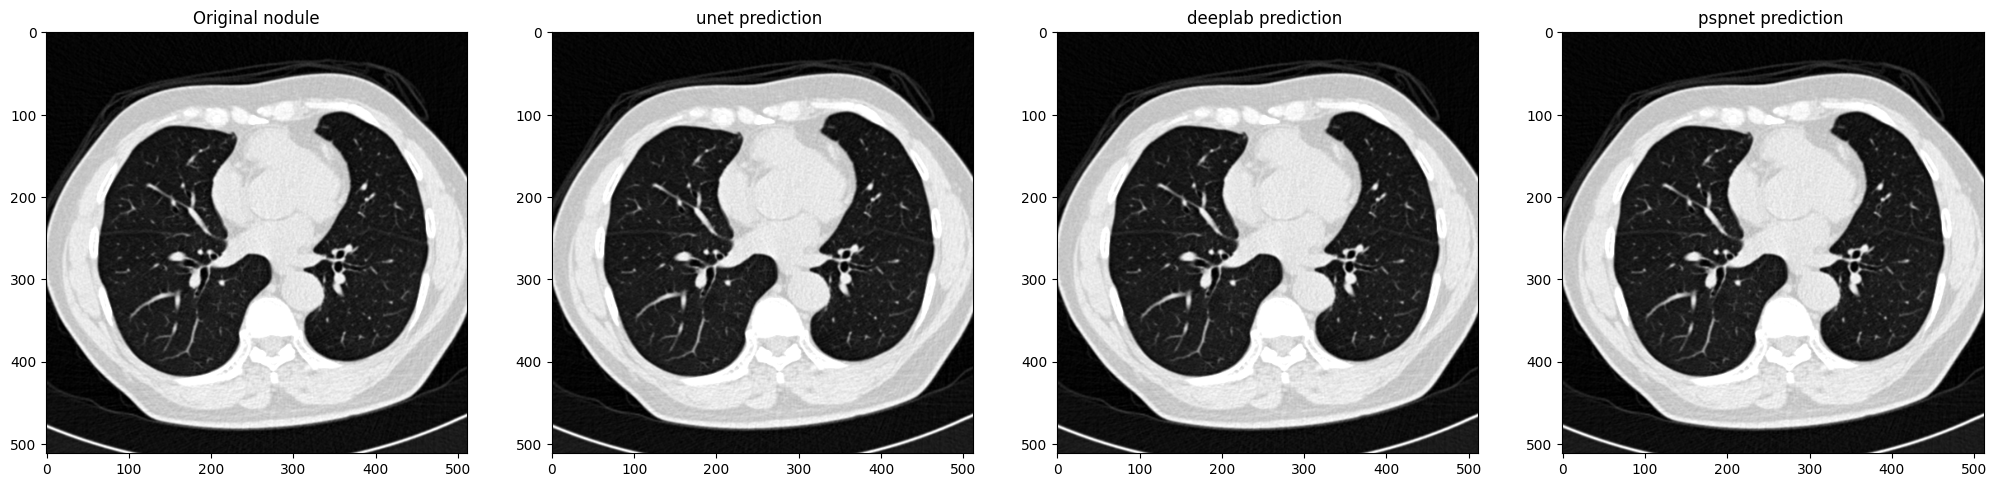

1/1 [==============================] - 0s 22ms/step


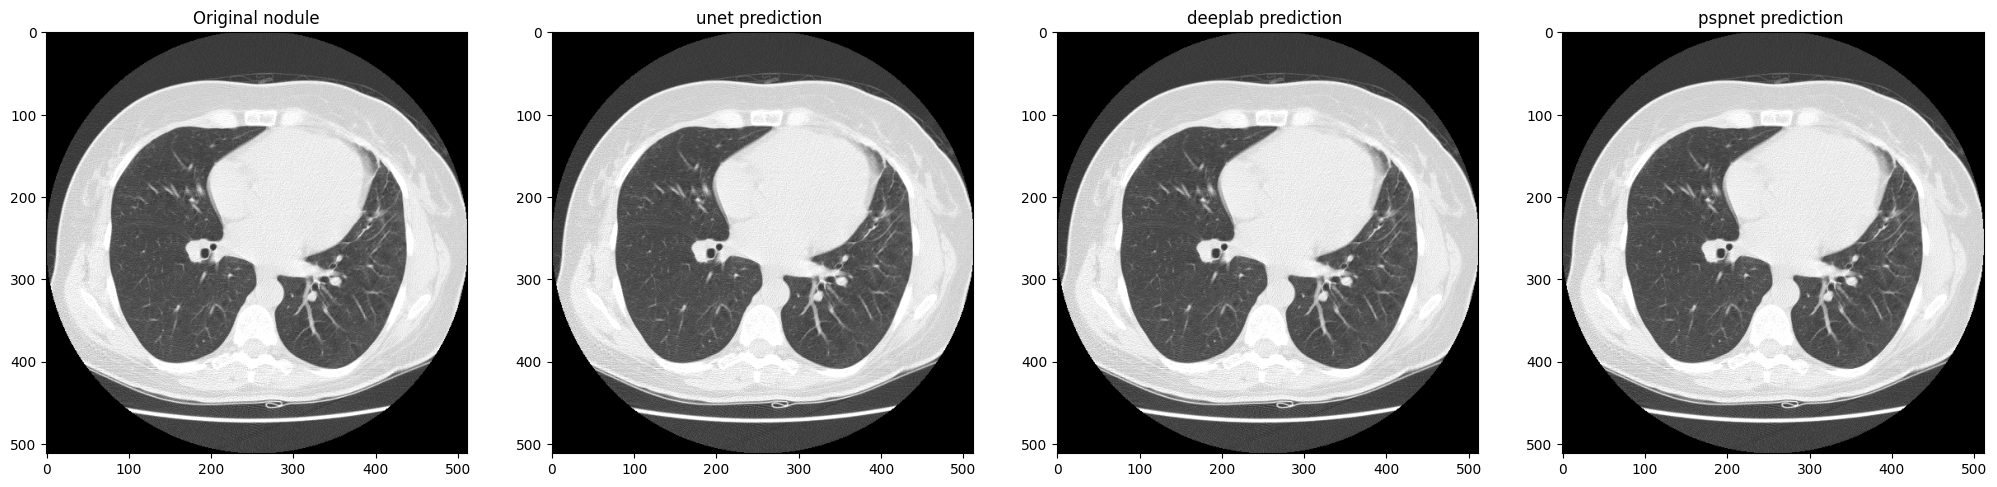

1/1 [==============================] - 0s 21ms/step


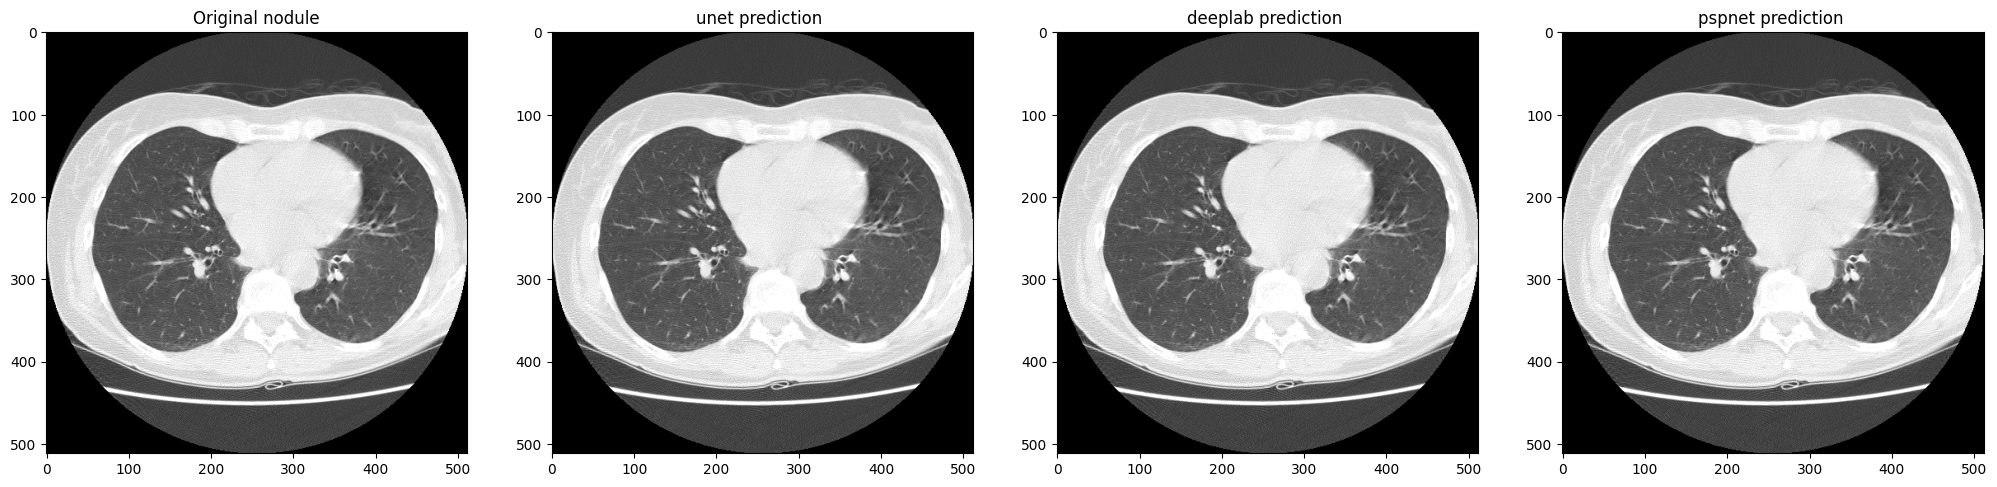

1/1 [==============================] - 0s 22ms/step


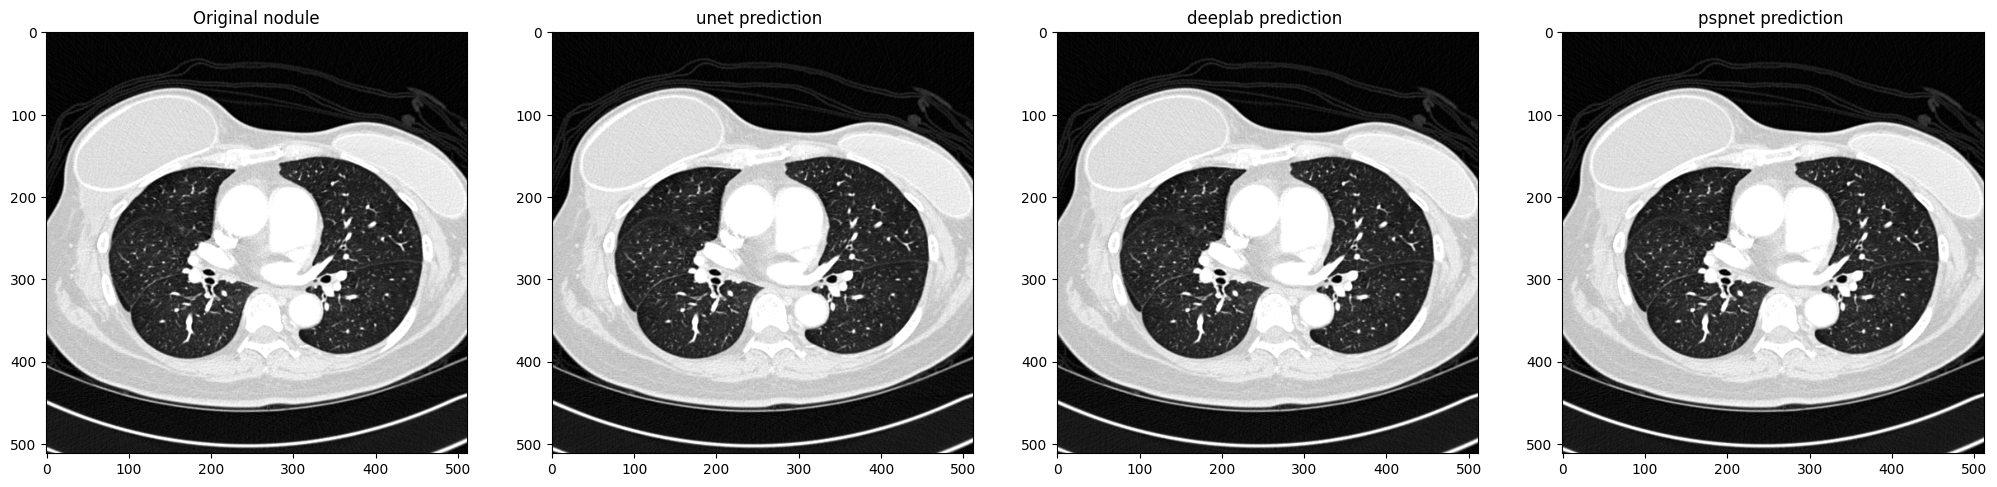

1/1 [==============================] - 0s 22ms/step


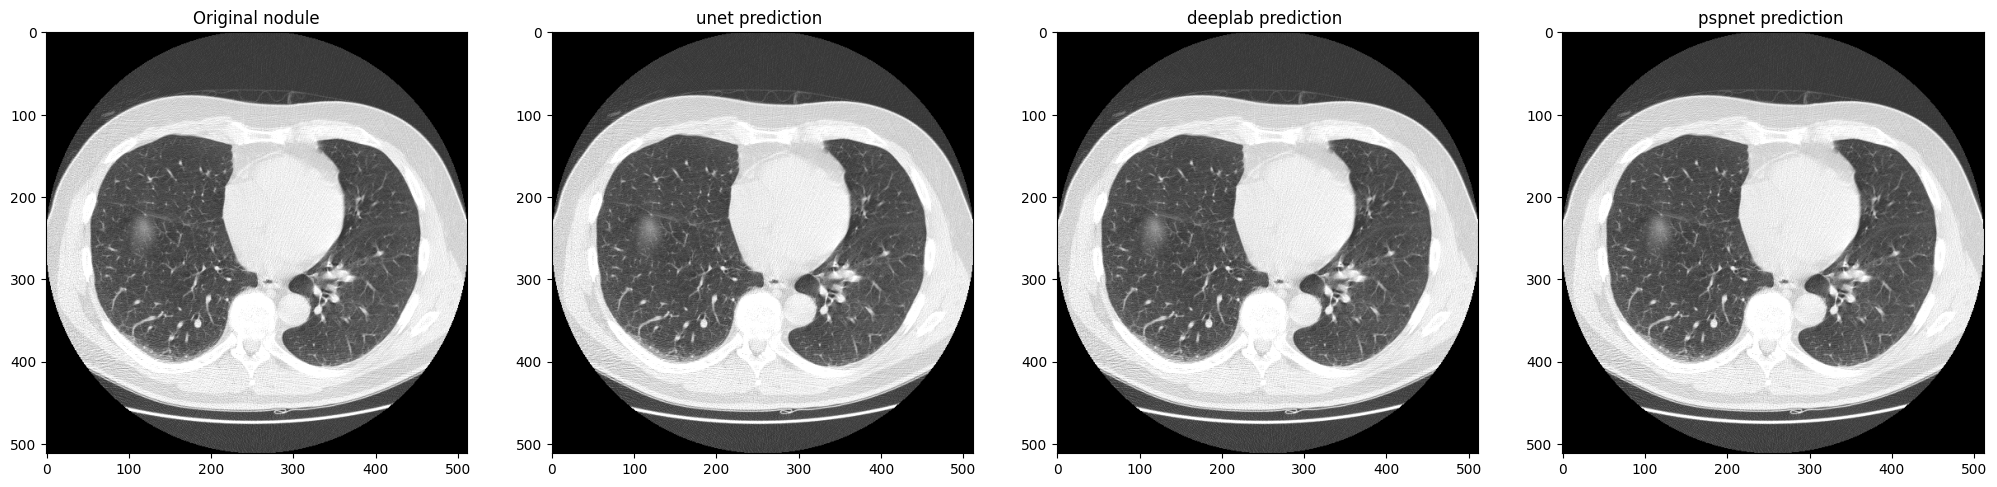

1/1 [==============================] - 0s 21ms/step


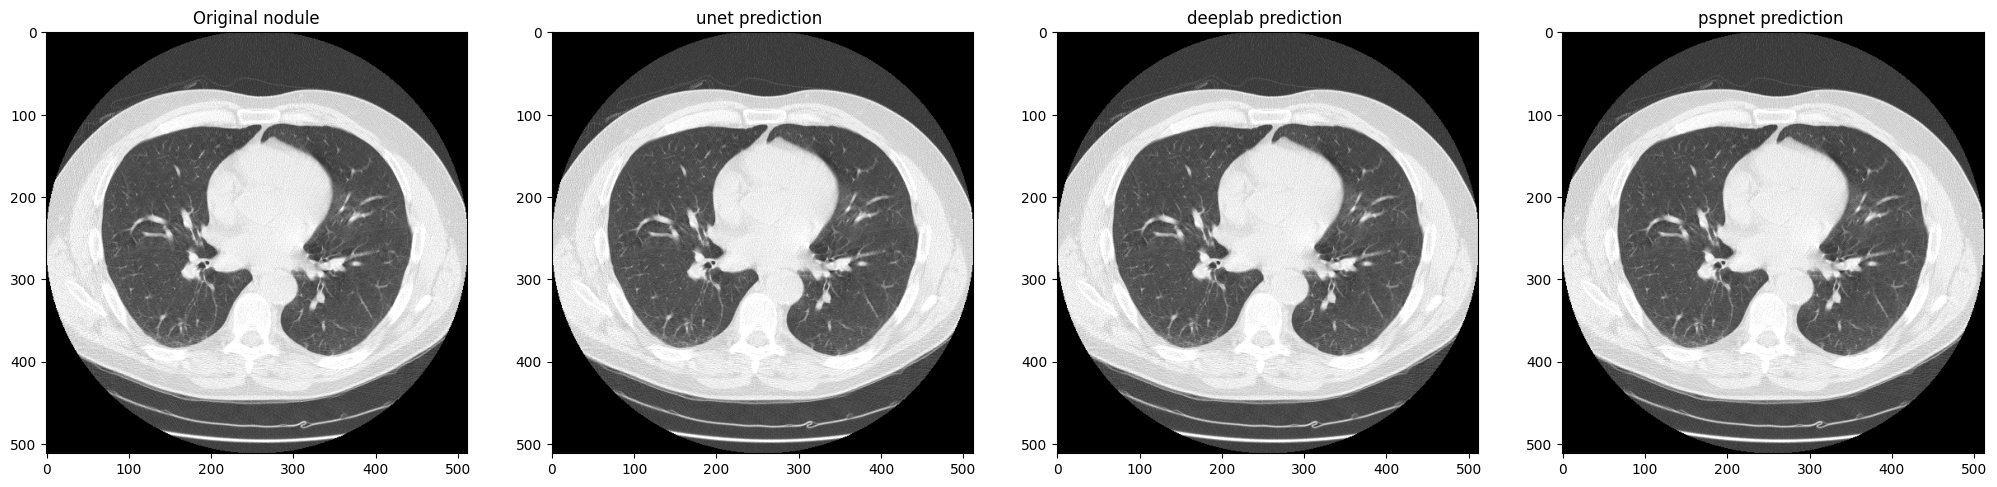

1/1 [==============================] - 0s 24ms/step


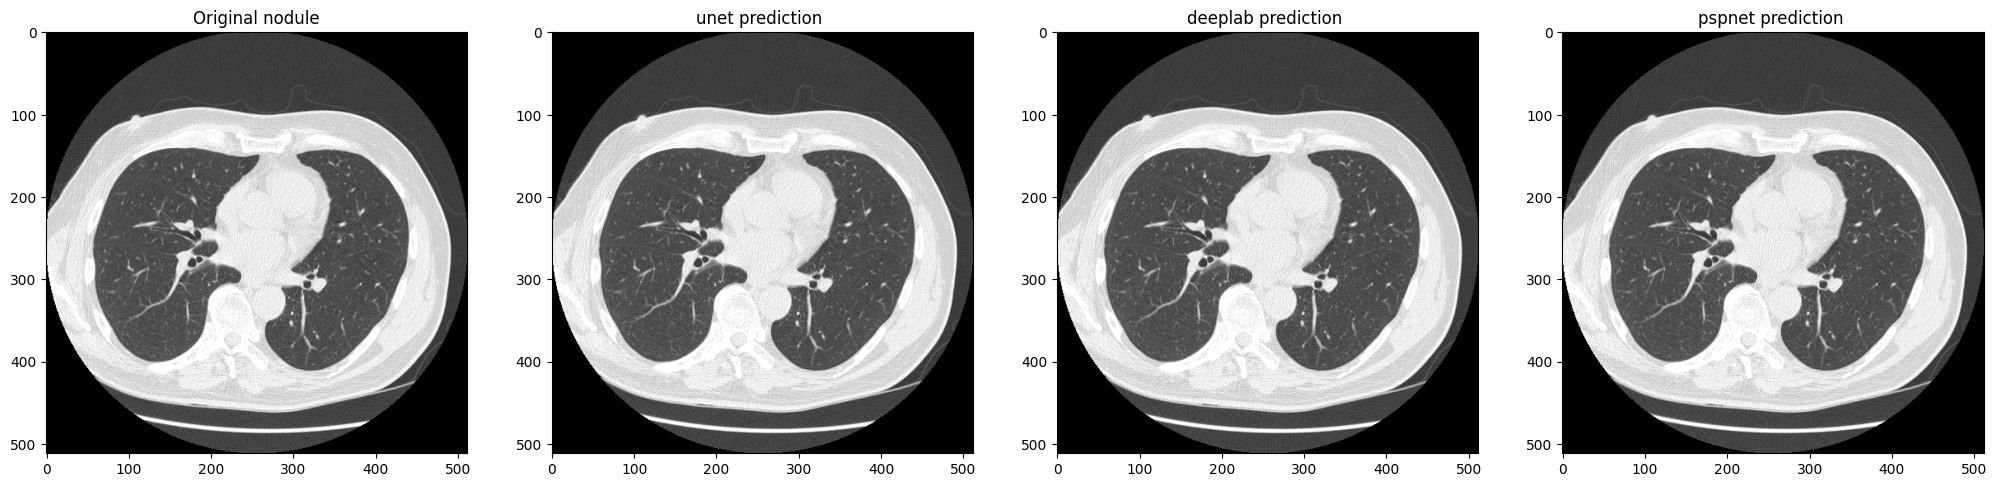

1/1 [==============================] - 0s 21ms/step


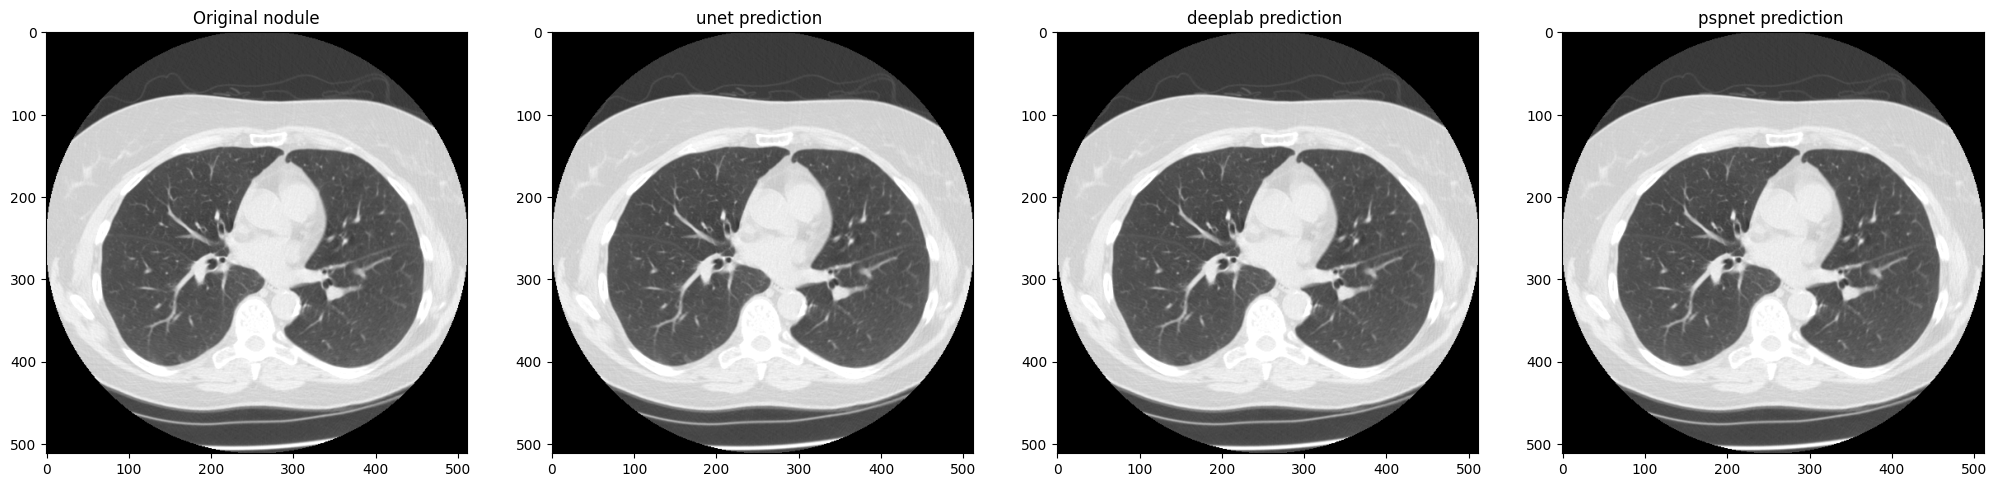

1/1 [==============================] - 0s 22ms/step


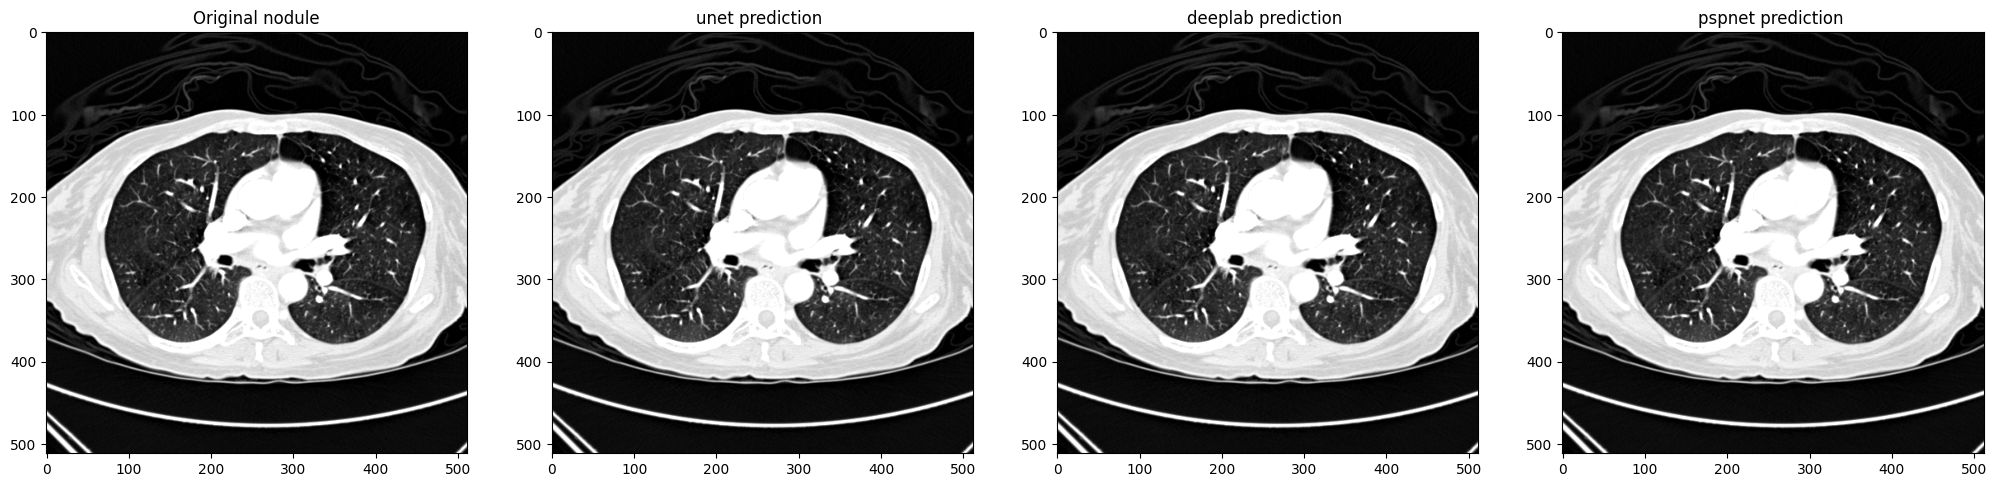

1/1 [==============================] - 0s 21ms/step


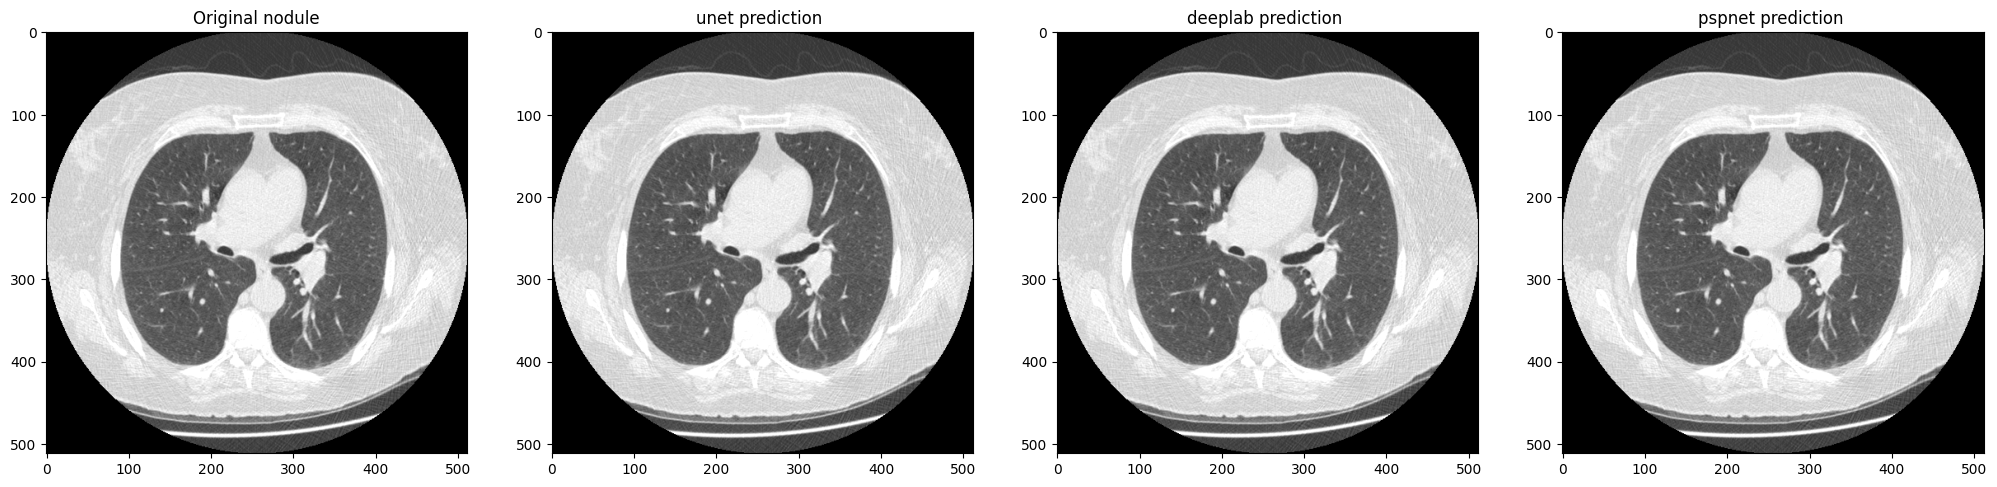

1/1 [==============================] - 0s 31ms/step


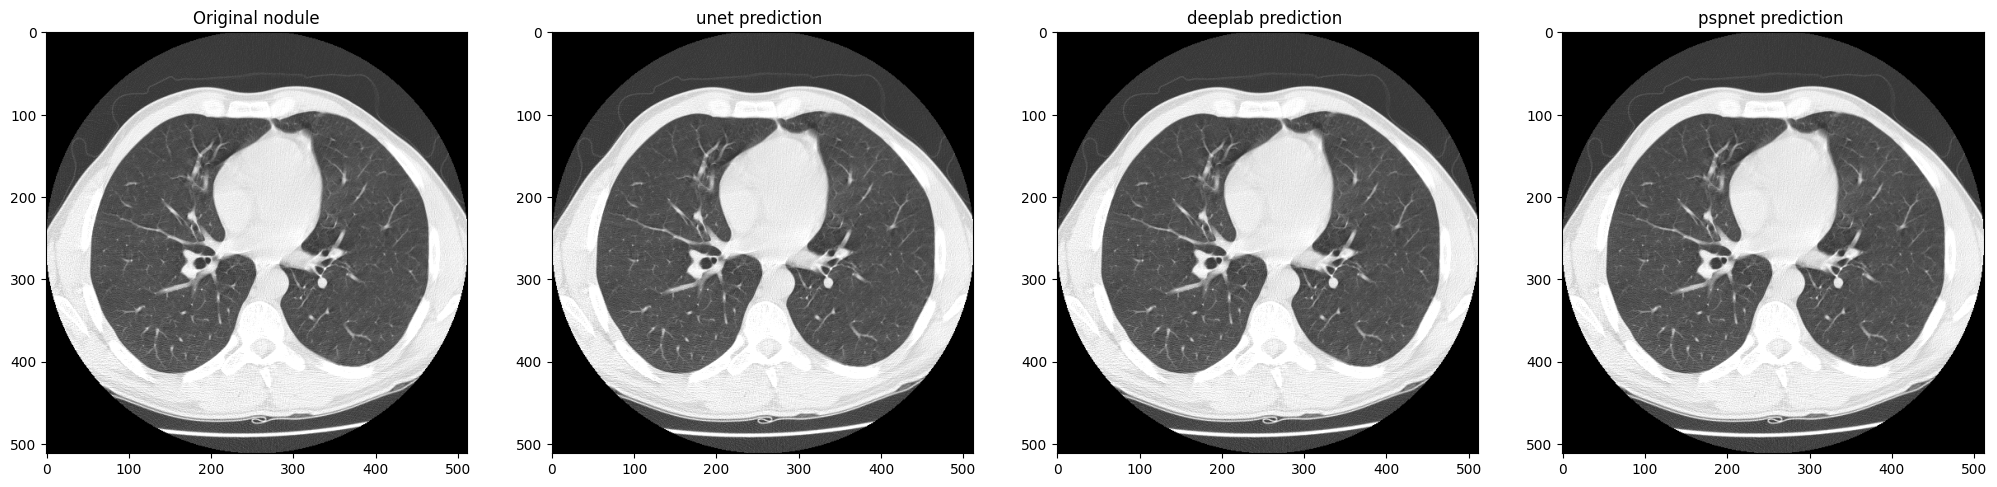

1/1 [==============================] - 0s 22ms/step


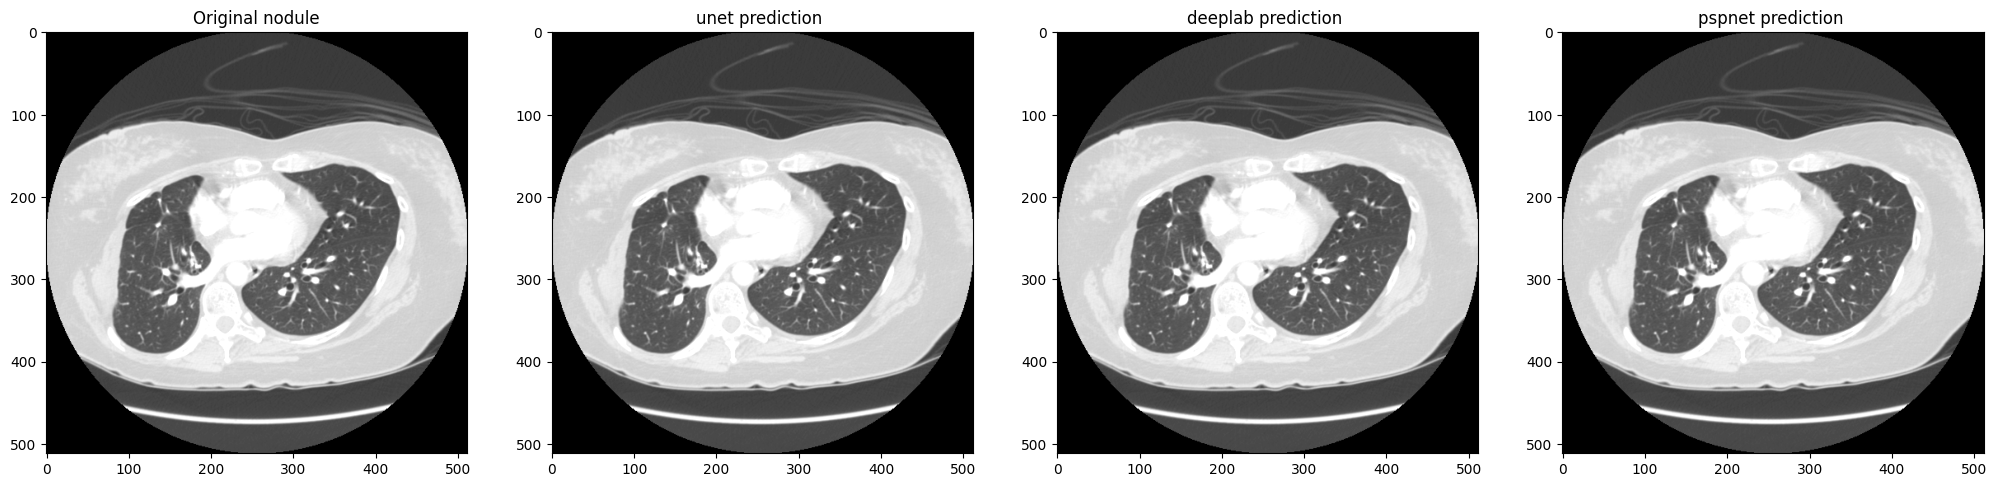

1/1 [==============================] - 0s 22ms/step


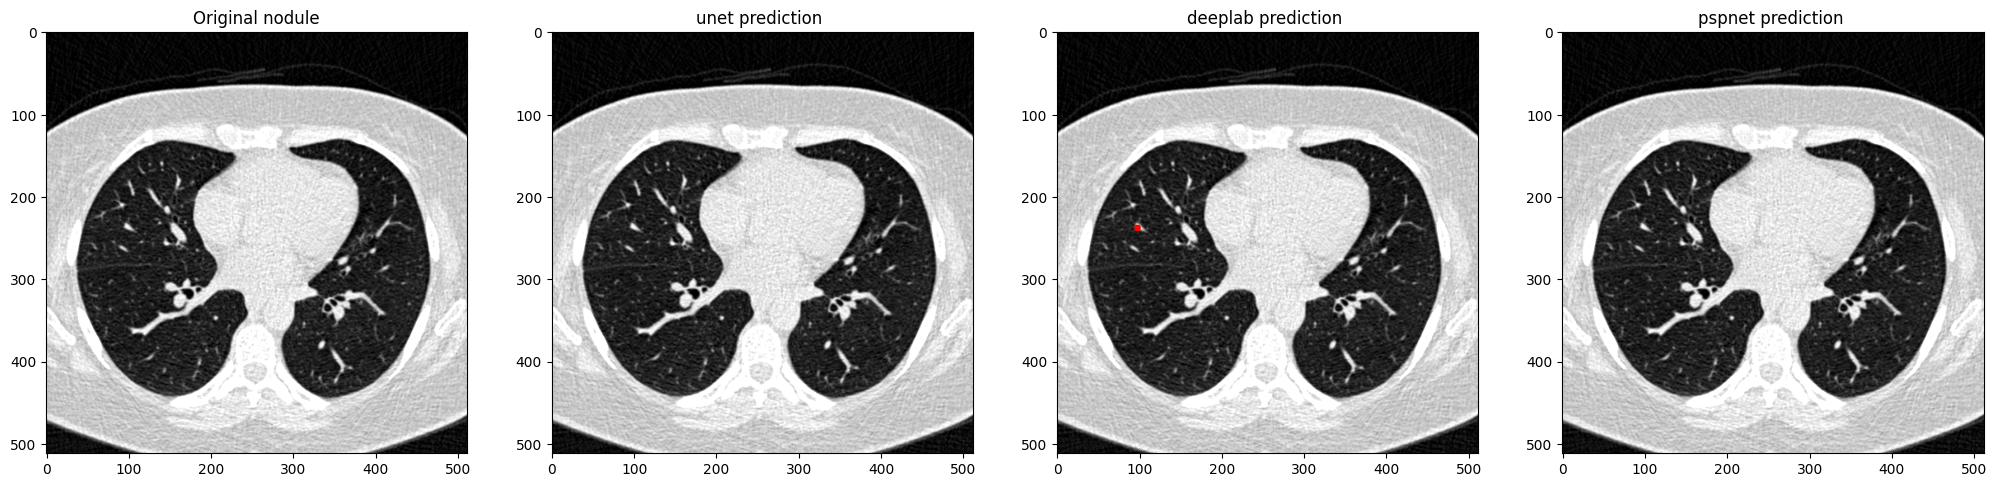

1/1 [==============================] - 0s 21ms/step


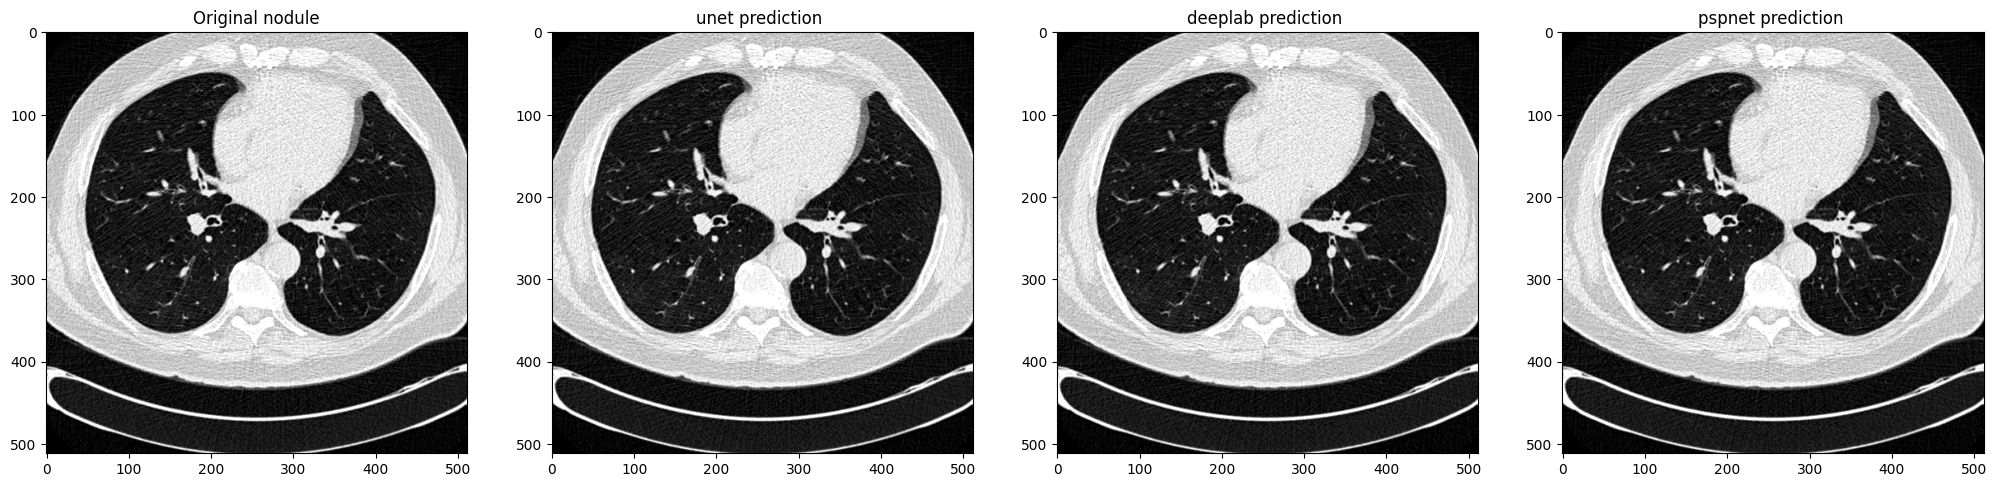

1/1 [==============================] - 0s 22ms/step


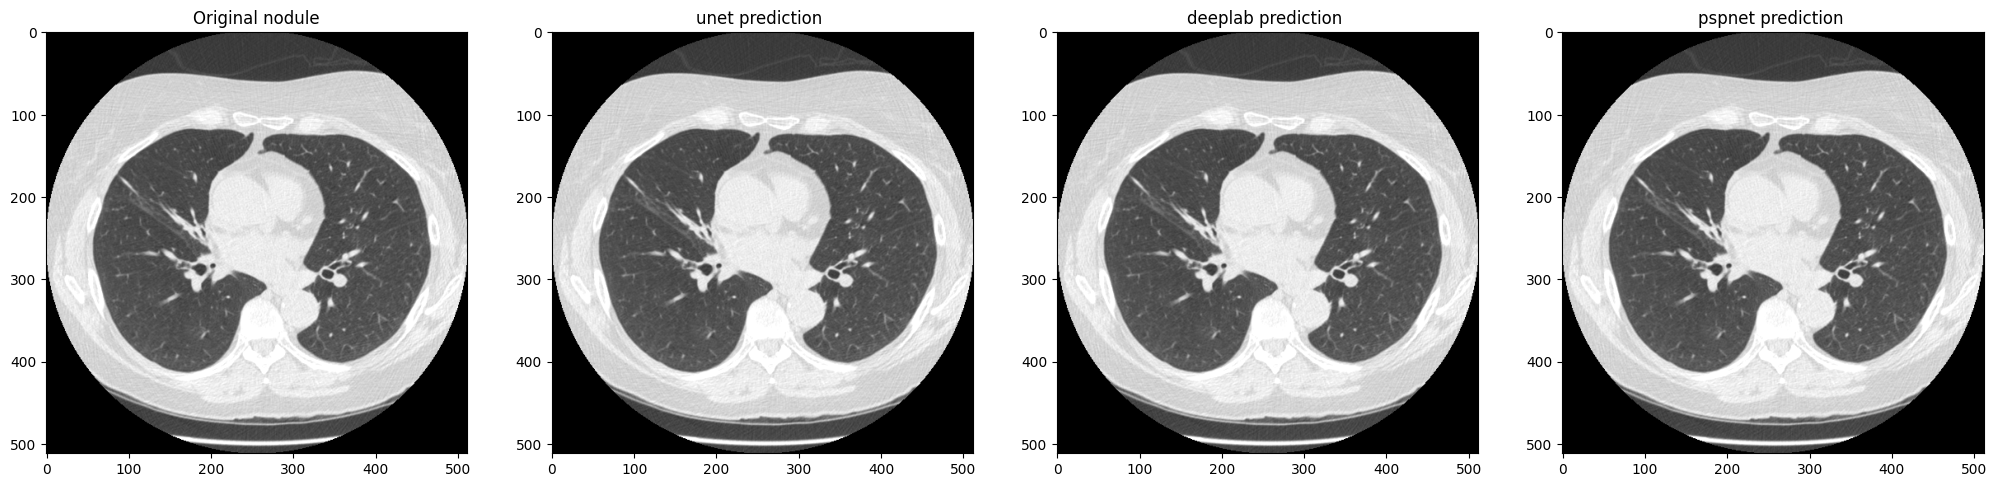

1/1 [==============================] - 0s 21ms/step


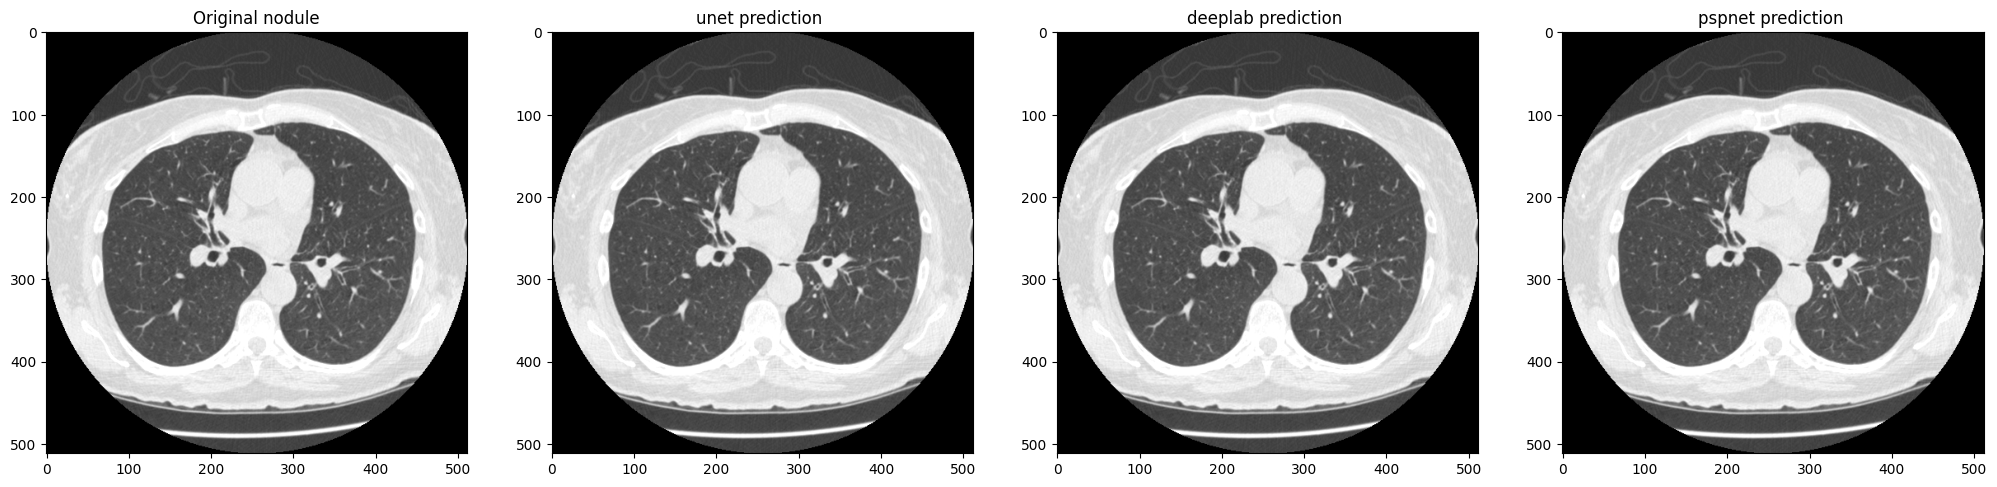

1/1 [==============================] - 0s 22ms/step


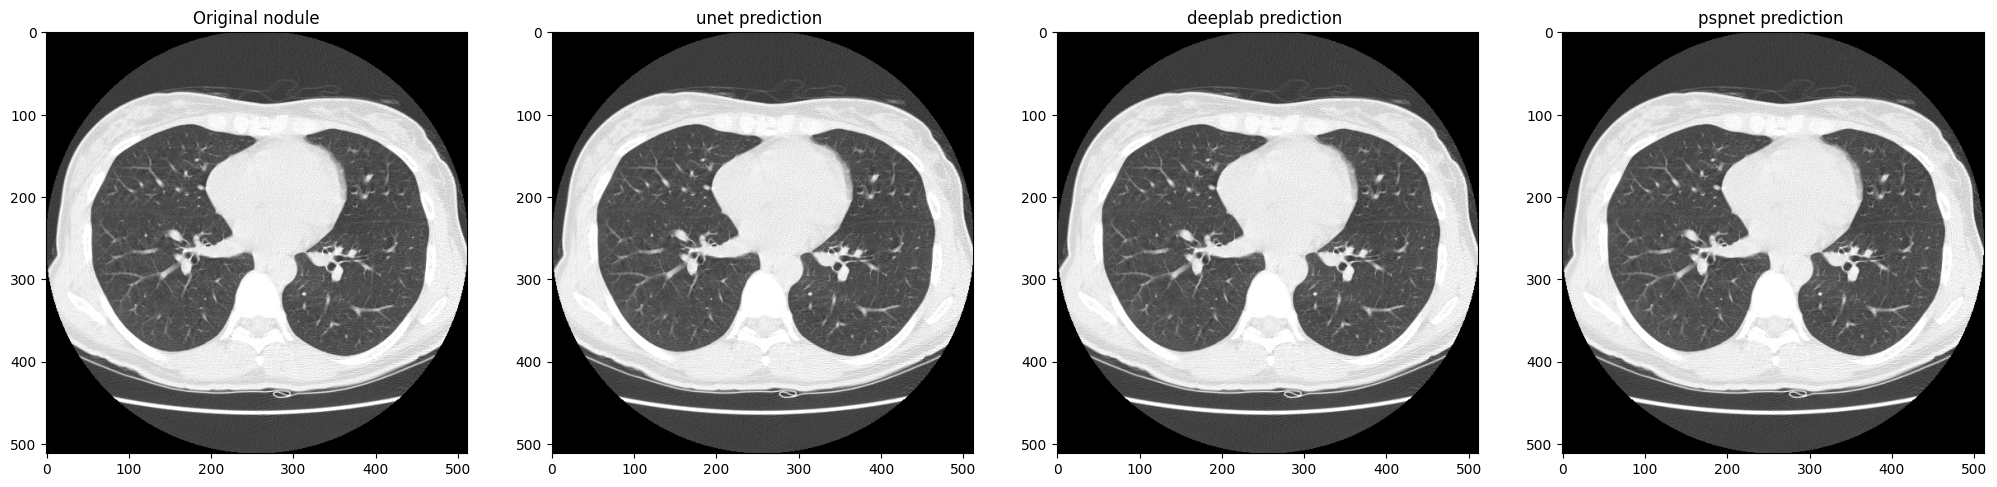

1/1 [==============================] - 0s 22ms/step


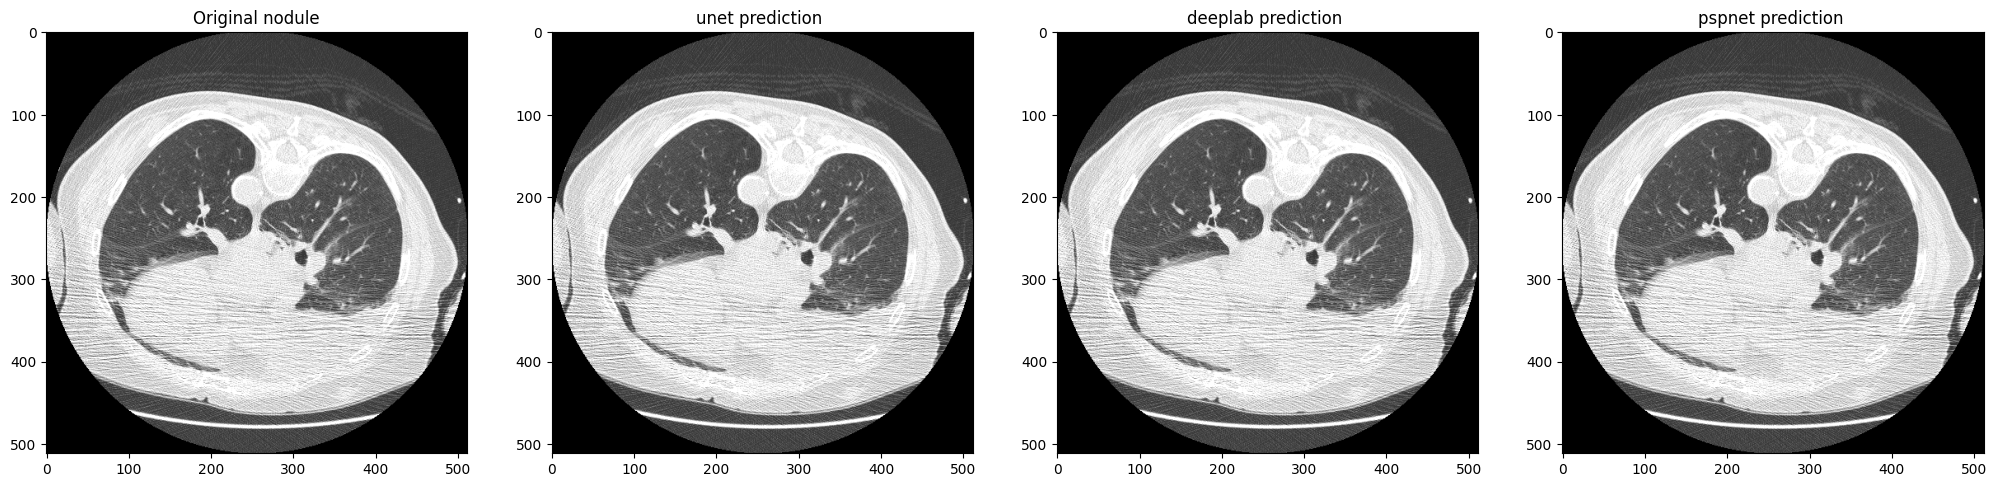

1/1 [==============================] - 0s 21ms/step


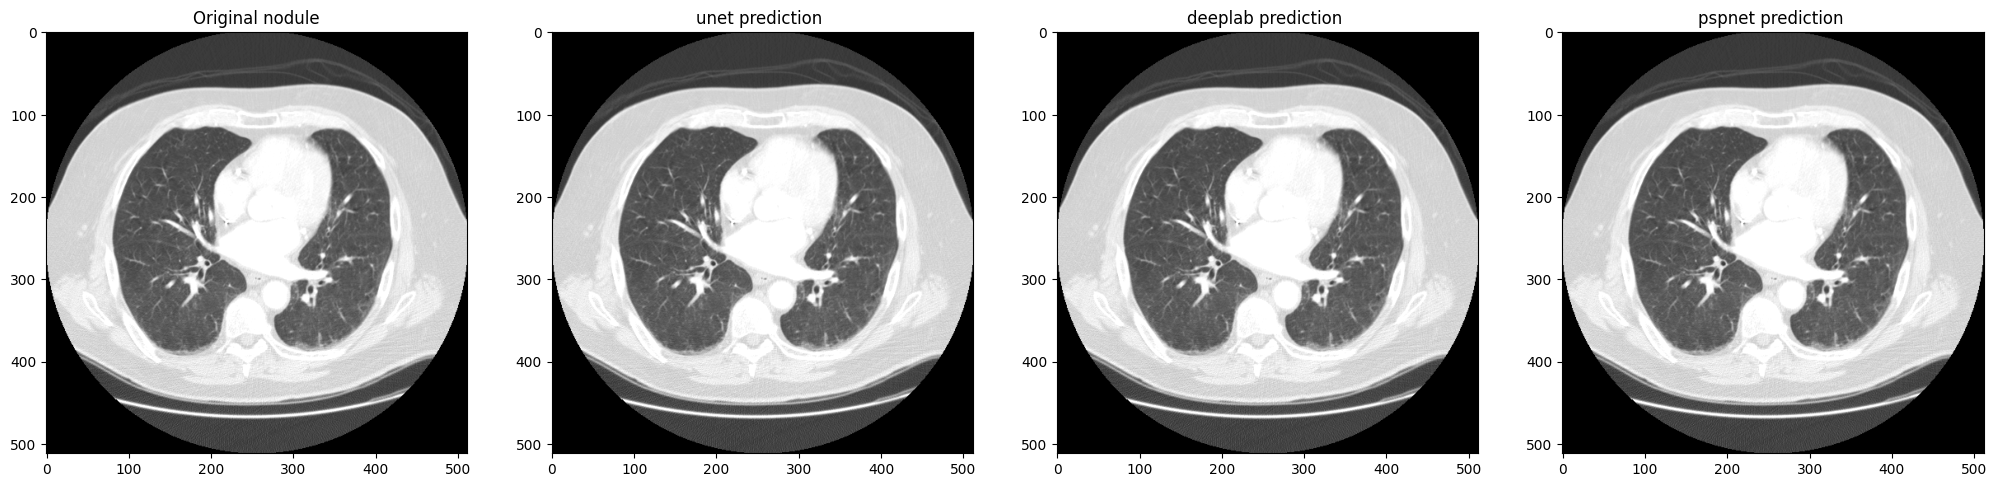

1/1 [==============================] - 0s 21ms/step


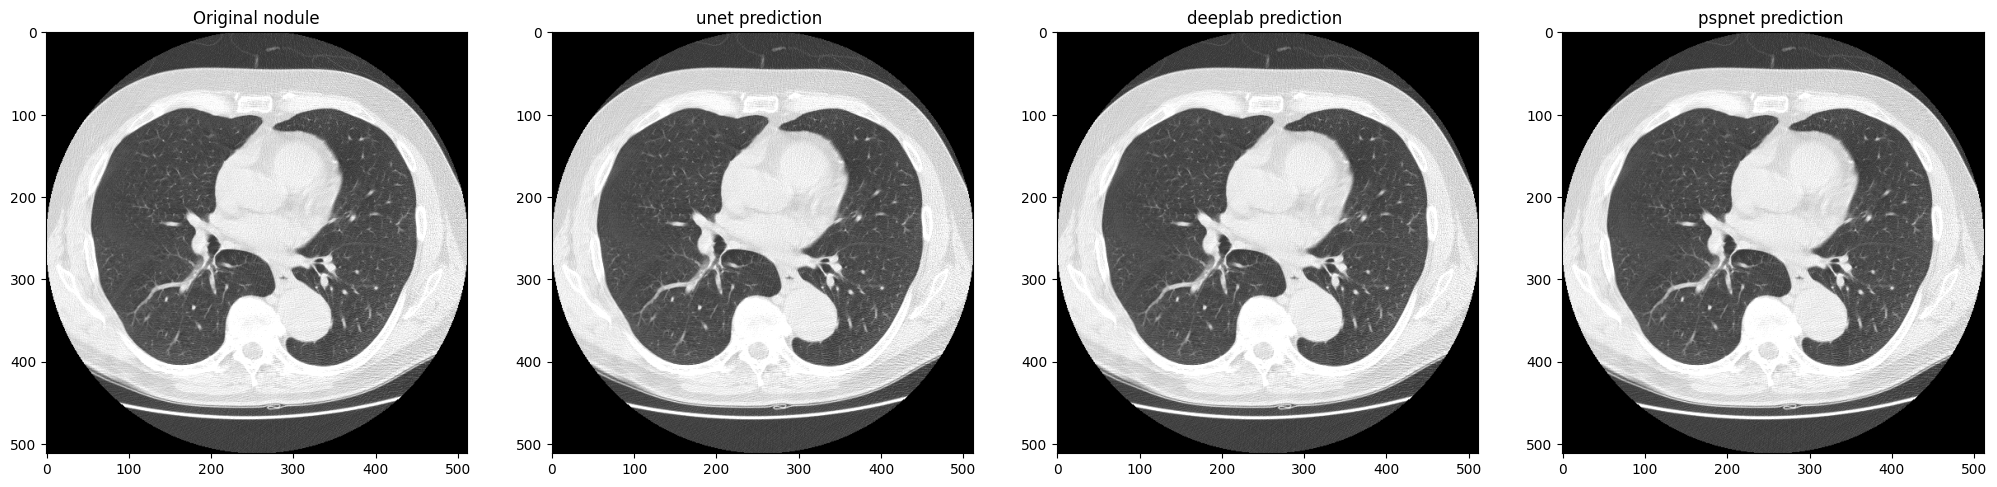

In [6]:
imges = os.listdir("D:/fin_de_etude/data/data2D/nonnodule/")
imges = imges[20:40]

for file in imges:
    img = np.load(os.path.join("D:/fin_de_etude/data/data2D/nonnodule/",file))
    mask =  np.load(os.path.join("D:/fin_de_etude/data/nodule_mask/nonnodule/",file))
    img = img/255
    pred1 = unet.predict(img.reshape(1,512,512,1))
    pred2 = deeplab.predict(img.reshape(1,512,512,1))
    pred3 = pspnet.predict(img.reshape(1,512,512,1))
    pred1 =np.where(pred1>0.5,1,0)
    pred2 =np.where(pred2>0.5,1,0)
    pred3 =np.where(pred3>0.5,1,0)
    img = img*255
    fig, (ax1, ax2,ax3,ax4) = plt.subplots(ncols=4, figsize=(25, 25))
    ax1.imshow(img,cmap="gray" )
    ax1.contour(mask, levels=[0.4], colors='r', linewidths=2)
    ax1.set_title('Original nodule')
    ax2.imshow(img,cmap='gray')
    ax2.contour(pred1.reshape((512,512)), levels=[0.4], colors='r', linewidths=2)
    ax2.set_title('unet prediction ')
    ax3.imshow(img,cmap='gray')
    ax3.contour(pred2.reshape((512,512)), levels=[0.4], colors='r', linewidths=2)
    ax3.set_title('deeplab prediction ')
    ax4.imshow(img,cmap='gray')
    ax4.contour(pred3.reshape((512,512)), levels=[0.4], colors='r', linewidths=2)
    ax4.set_title('pspnet prediction ')
   
    
    
    

    plt.show()